<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4623 entries, 0 to 4622
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           4623 non-null   object 
 1   anio                     4623 non-null   int64  
 2   campania                 4623 non-null   object 
 3   provincia_nombre         4623 non-null   object 
 4   provincia_id             4623 non-null   int64  
 5   departamento_nombre      4623 non-null   object 
 6   departamento_id          4623 non-null   int64  
 7   superficie_sembrada_ha   4623 non-null   int64  
 8   superficie_cosechada_ha  4623 non-null   int64  
 9   produccion_tm            4622 non-null   float64
 10  rendimiento_kgxha        4619 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 397.4+ KB

Primeras filas del dataset:
     cultivo_nombre  anio   campania provincia_nombre  provincia_id  \
0  Cebada cervecera  1938  

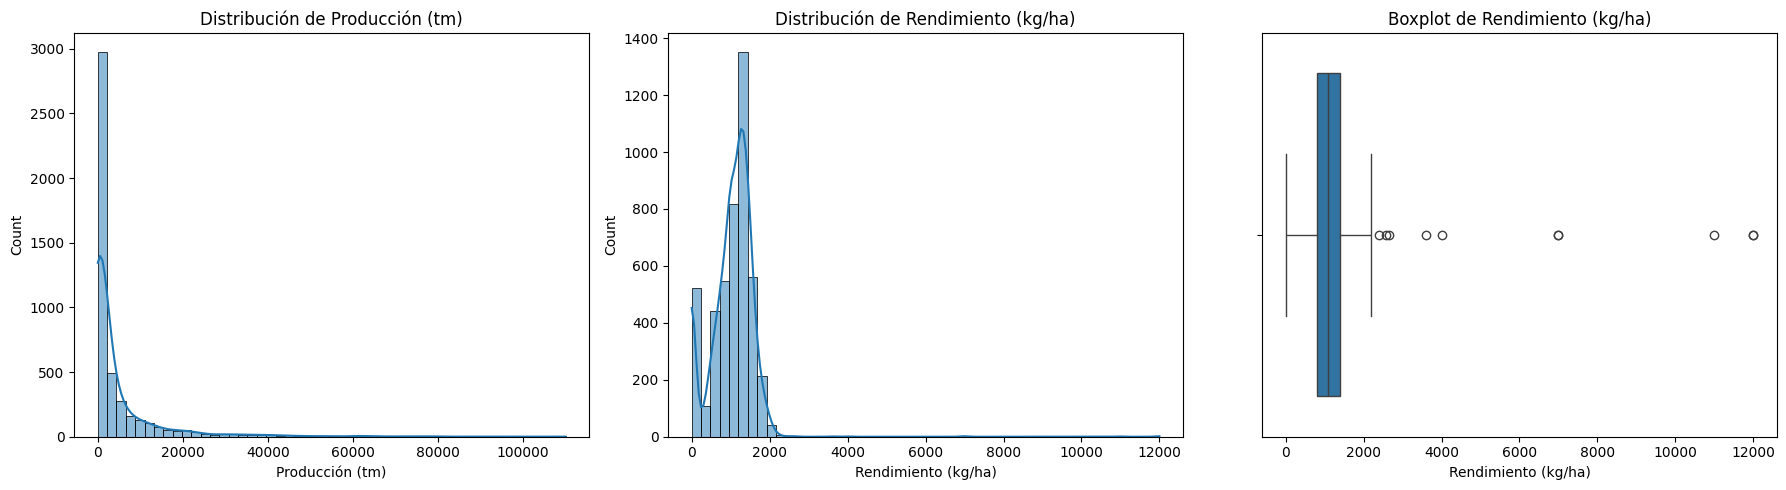

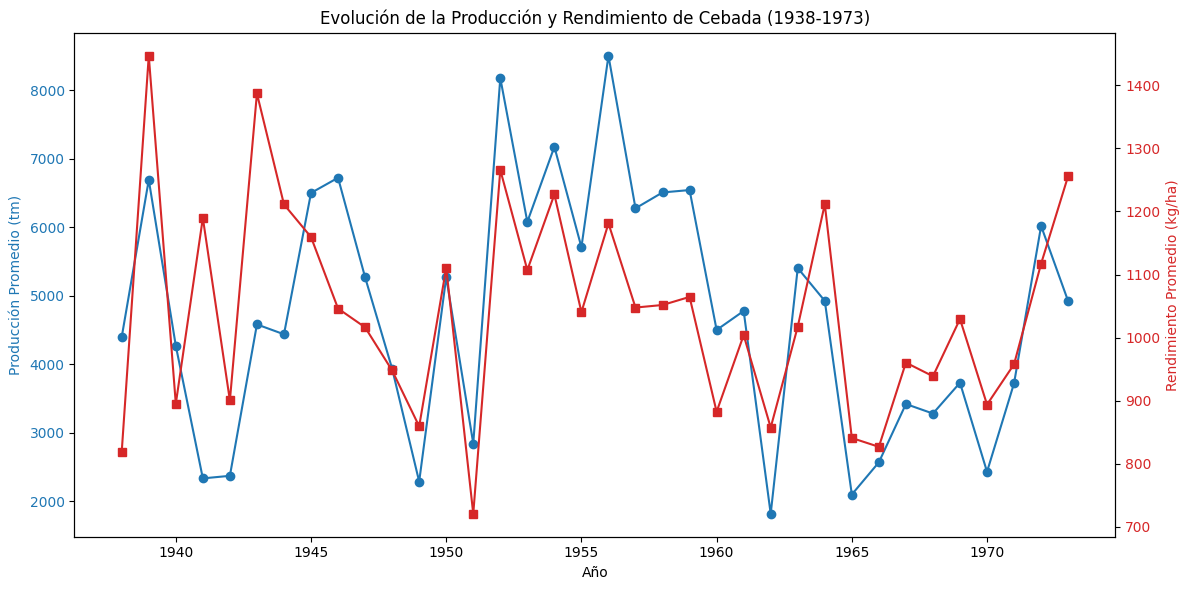

In [ ]:
# Cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_url = "./cebada-cervecera-serie-1938-1973.csv"
df = pd.read_csv(file_url, encoding="latin1")

# Mostrar información general del dataset
df.info()
print("\nPrimeras filas del dataset:")
print(df.head())

# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isna().sum())

# Estadísticas descriptivas
describe_df = df.describe()
print("\nEstadísticas descriptivas:")
print(describe_df)

# Visualización de la distribución de producción y rendimiento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["produccion_tm"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Producción (tm)")
axes[0].set_xlabel("Producción (tm)")

sns.histplot(df["rendimiento_kgxha"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Rendimiento (kg/ha)")
axes[1].set_xlabel("Rendimiento (kg/ha)")

sns.boxplot(x=df["rendimiento_kgxha"], ax=axes[2])
axes[2].set_title("Boxplot de Rendimiento (kg/ha)")
axes[2].set_xlabel("Rendimiento (kg/ha)")

plt.tight_layout()
plt.show()

# Evolución temporal de la producción y rendimiento
df_yearly = df.groupby("anio")[["produccion_tm", "rendimiento_kgxha"]].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Año")
ax1.set_ylabel("Producción Promedio (tm)", color="tab:blue")
ax1.plot(df_yearly.index, df_yearly["produccion_tm"], color="tab:blue", marker="o", label="Producción (tm)")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Rendimiento Promedio (kg/ha)", color="tab:red")
ax2.plot(df_yearly.index, df_yearly["rendimiento_kgxha"], color="tab:red", marker="s", label="Rendimiento (kg/ha)")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Evolución de la Producción y Rendimiento de Cebada (1938-1973)")
fig.tight_layout()
plt.show()